# Principal Component Analysis with Cancer Data

In [61]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [110]:
df = pd.read_csv('D:/my_work/residency5/Lab/breast-cancer-wisconsin-data.csv')
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [111]:
print(df.info())
print("Shape",df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB
None
Shape (699, 11)


In [112]:
df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [113]:
# We could see "?" values in column, this should be removed from data set
print(df.isnull().sum())
# Check for missing value in any other column


ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64


In [114]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
df= df.replace('?',np.nan)
print(df.isnull().sum())


ID                              0
ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                         0
Class                           0
dtype: int64


In [115]:
#df= df.dropna()
mode = df['Bare Nuclei'].mode()[0]
df['Bare Nuclei']= df['Bare Nuclei'].fillna(mode)
print(df.isnull().sum())

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64


In [117]:
df['Bare Nuclei']= df['Bare Nuclei'].astype('int64')

In [119]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10)
memory usage: 54.7 KB


In [0]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


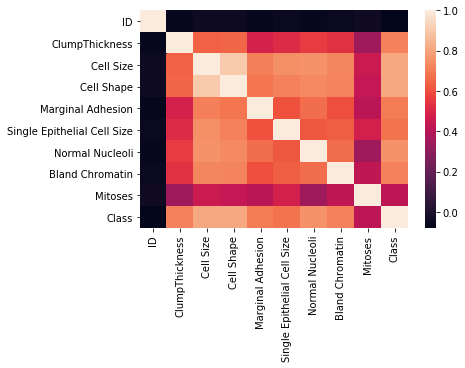

In [86]:
# Check for correlation of variable
corr= df.corr()
sns.heatmap(corr)

In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [124]:
pd.value_counts(df['Class'])

2    458
4    241
Name: Class, dtype: int64

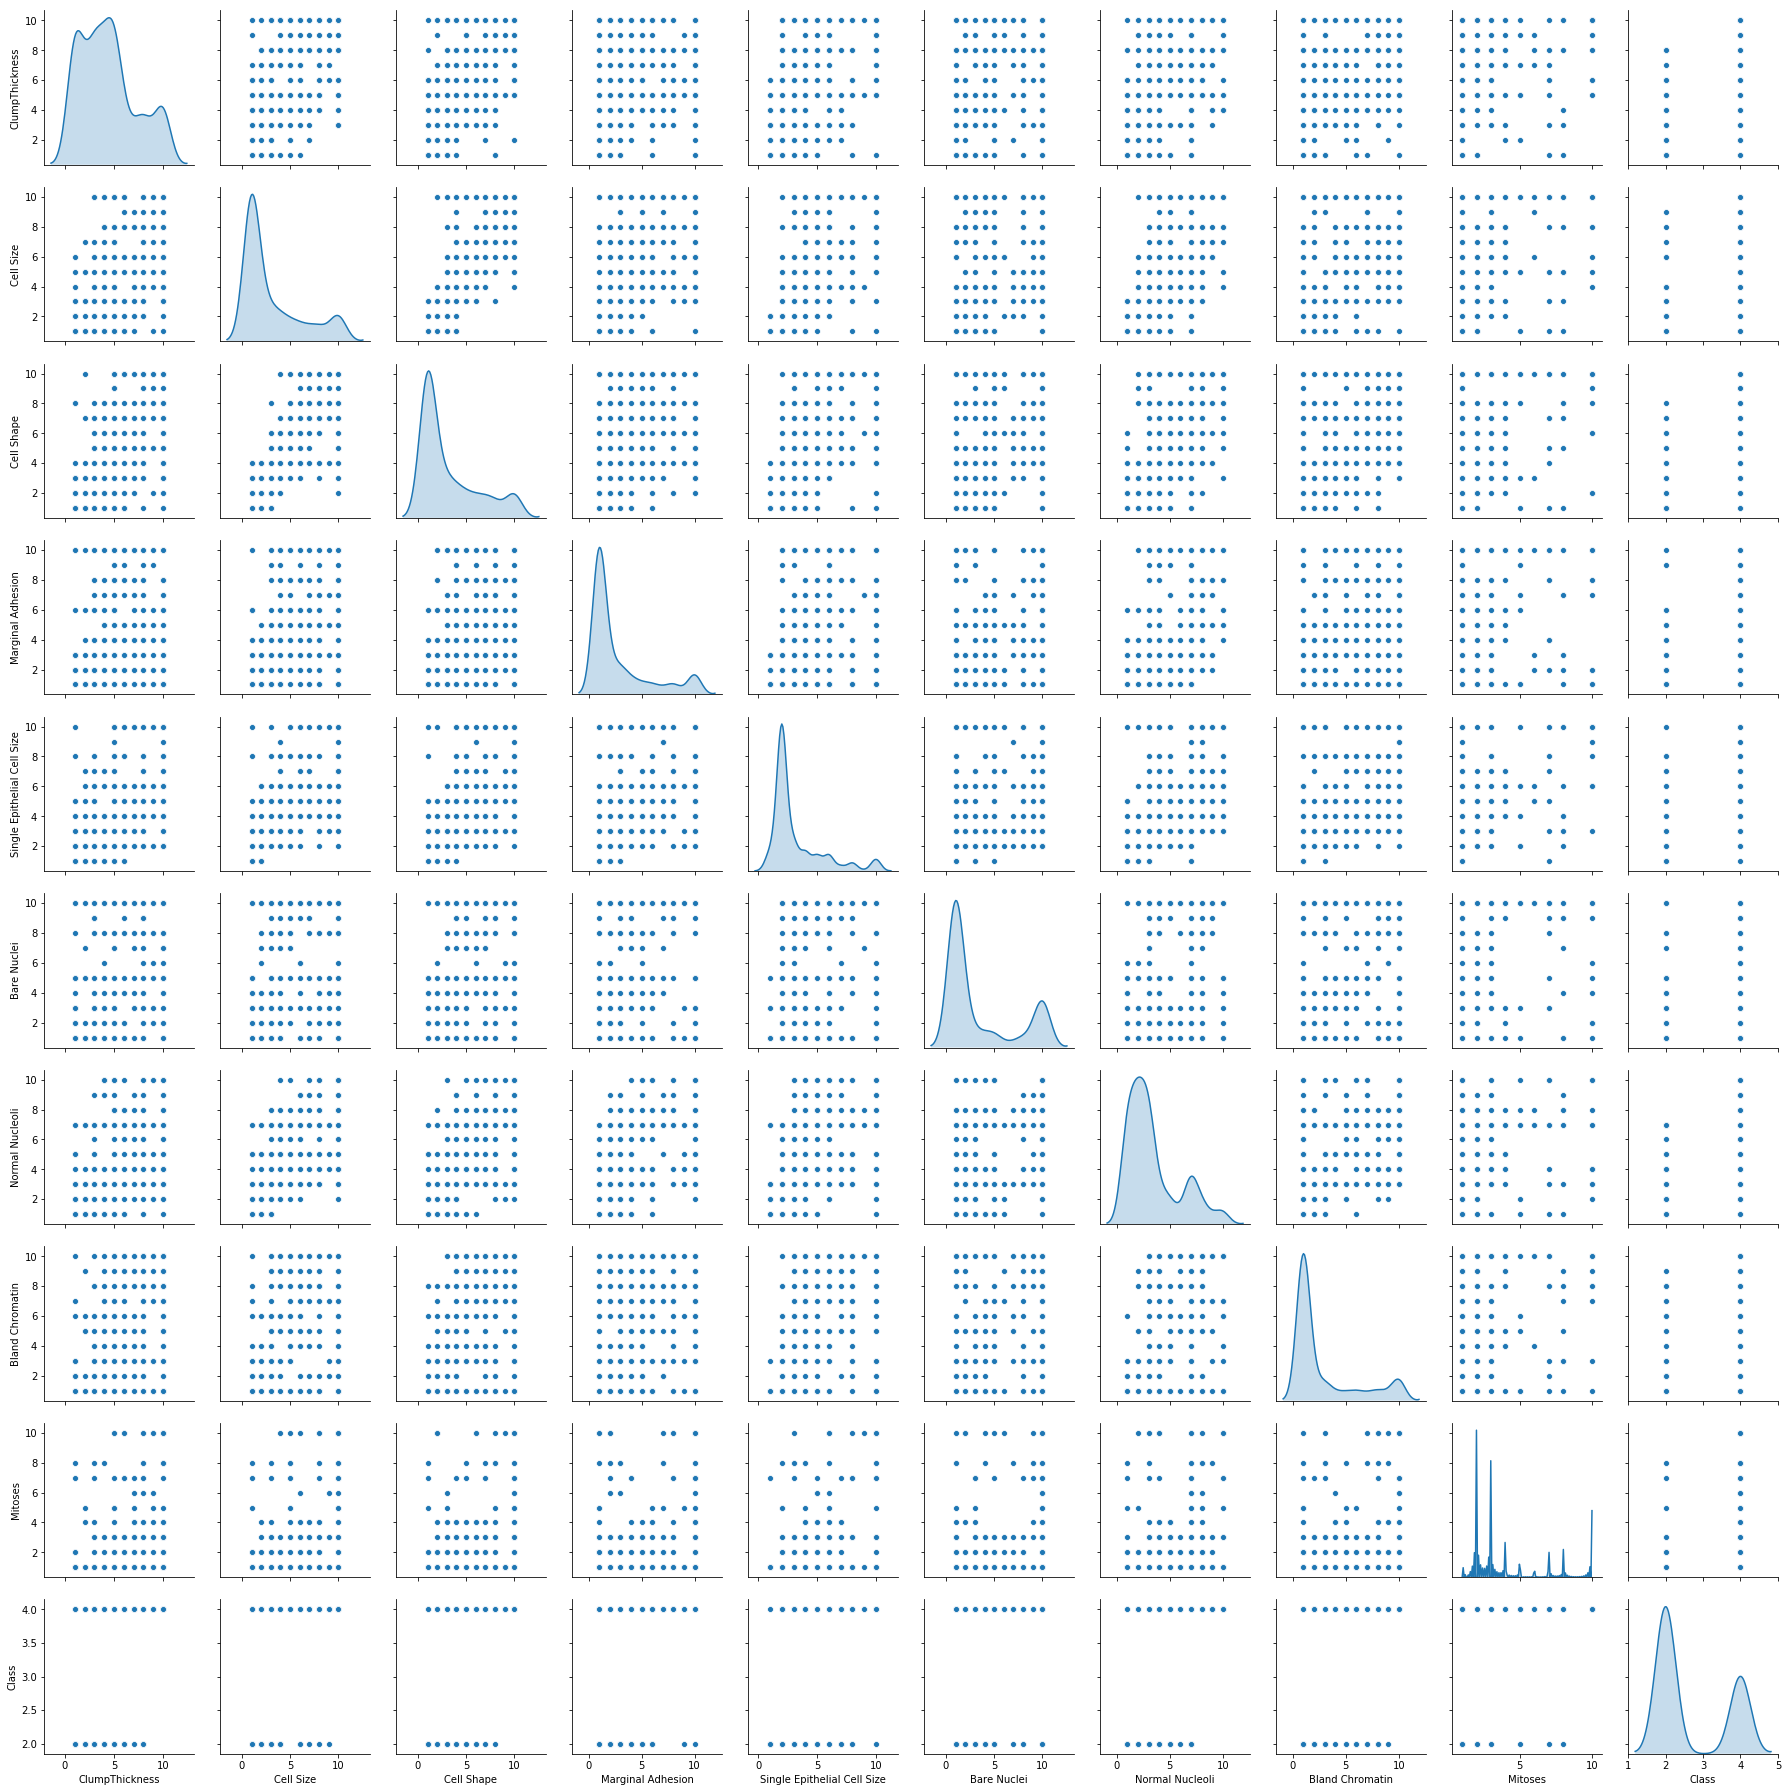

In [126]:
#Let us check for pair plots
sns.pairplot(df, diag_kind='kde')


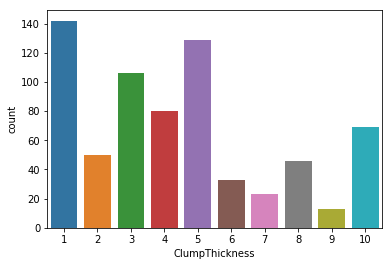

In [88]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10
sns.countplot(x=df['ClumpThickness'])

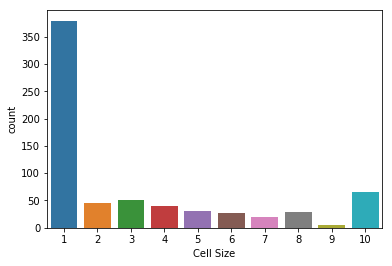

In [90]:
sns.countplot(x=df['Cell Size'])

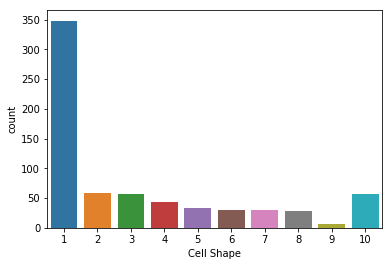

In [92]:
sns.countplot(x=df['Cell Shape'])

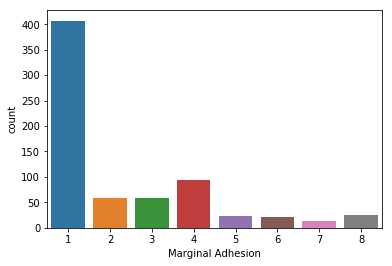

In [242]:
sns.countplot(x=df['Marginal Adhesion'])


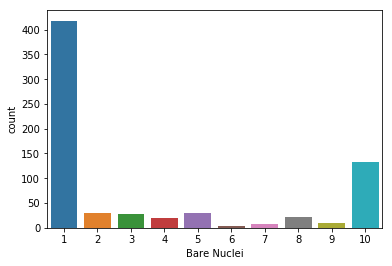

In [244]:
sns.countplot(x=df['Bare Nuclei'])

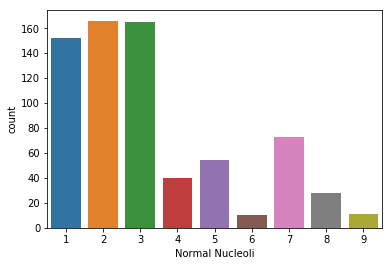

In [246]:
sns.countplot(x=df['Normal Nucleoli'])

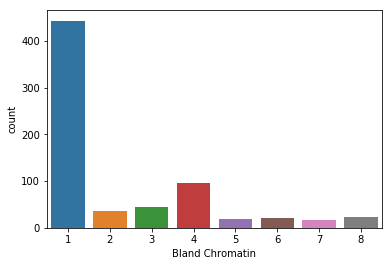

In [251]:
sns.countplot(x=df['Bland Chromatin'])

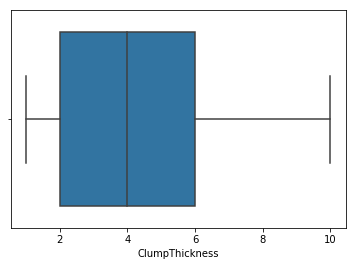

In [106]:
sns.boxplot(df['ClumpThickness'])

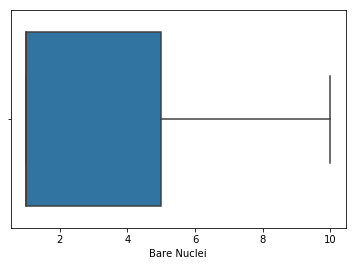

In [127]:
sns.boxplot(df['Bare Nuclei'])

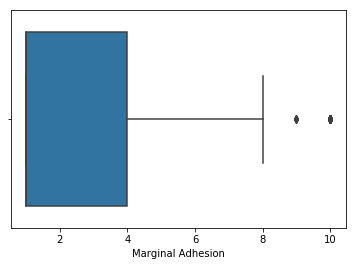

In [129]:
sns.boxplot(df['Marginal Adhesion'])

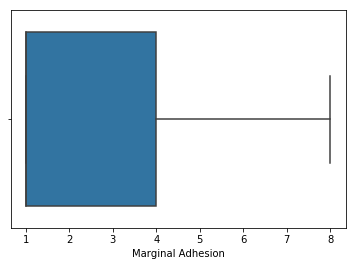

In [136]:
df['Marginal Adhesion']= np.where(df['Marginal Adhesion']>8,8,df['Marginal Adhesion'])
sns.boxplot(df['Marginal Adhesion'])


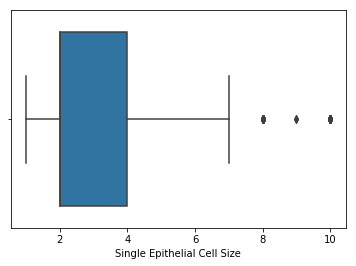

In [137]:
sns.boxplot(df['Single Epithelial Cell Size'])



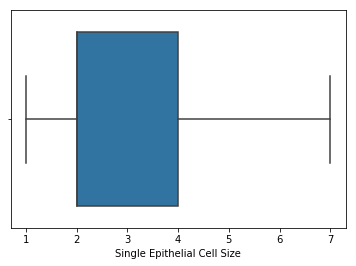

In [139]:
df['Single Epithelial Cell Size']= np.where(df['Single Epithelial Cell Size']>7,7,df['Single Epithelial Cell Size'])
sns.boxplot(df['Single Epithelial Cell Size'])

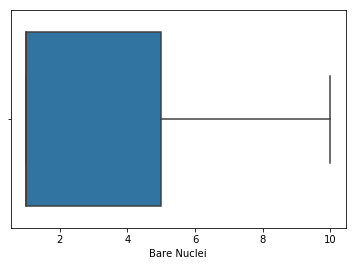

In [141]:

sns.boxplot(df['Bare Nuclei'])

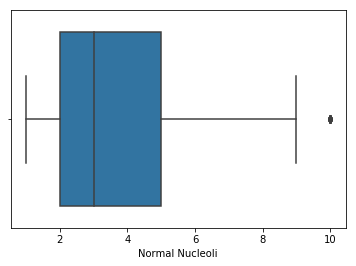

In [145]:
sns.boxplot(df['Normal Nucleoli'])


  

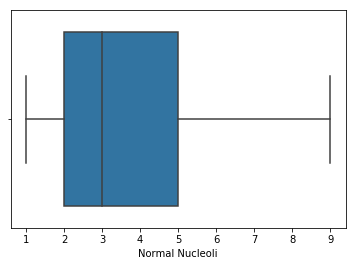

In [146]:
df['Normal Nucleoli']= np.where(df['Normal Nucleoli']>9,9,df['Normal Nucleoli'])
sns.boxplot(df['Normal Nucleoli'])

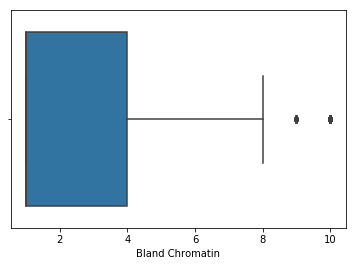

In [147]:
sns.boxplot(df['Bland Chromatin'])

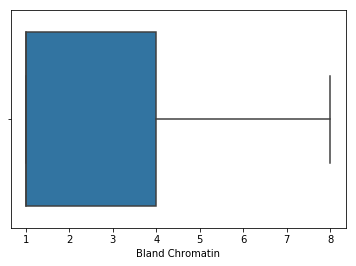

In [157]:
df['Bland Chromatin']= np.where(df['Bland Chromatin']>8,8,df['Bland Chromatin'])
sns.boxplot(df['Bland Chromatin'])

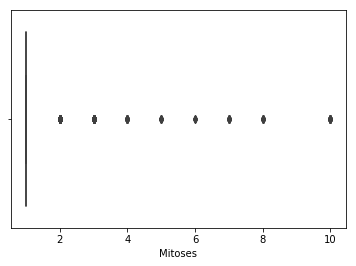

In [200]:
sns.boxplot(df['Mitoses'])

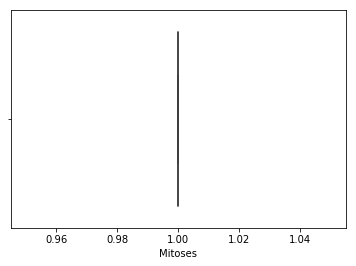

In [201]:
df['Mitoses']= np.where(df['Mitoses']>1,1,df['Mitoses'])
sns.boxplot(df['Mitoses'])

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [0]:
# We could see most of the outliers are now removed.

In [202]:
from sklearn.preprocessing import StandardScaler
X= df.drop(columns='Class')
Y= df['Class']
sc=StandardScaler()
sc.fit_transform(X)

array([[ 0.20693572, -0.69999505, -0.74329904, ..., -0.13515885,
        -0.63506985,  0.        ],
       [ 0.20693572,  0.28384518,  0.2668747 , ..., -0.13515885,
        -0.11829008,  0.        ],
       [-0.50386559, -0.69999505, -0.74329904, ..., -0.13515885,
        -0.63506985,  0.        ],
       ...,
       [ 0.20693572,  2.25152563,  2.28722218, ...,  2.15794881,
         0.91526947,  0.        ],
       [-0.14846494,  1.59563215,  0.94032386, ...,  0.78208421,
         1.94882903,  0.        ],
       [-0.14846494,  1.59563215,  1.61377302, ...,  0.78208421,
         0.91526947,  0.        ]])

# Q6 Create a covariance matrix for identifying Principal components

In [203]:
# PCA
# Step 1 - Create covariance matrix
X.info()
cov = np.cov(X.T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
dtypes: int64(9)
memory usage: 49.2 KB


# Q7 Identify eigen values and eigen vector

In [252]:
# Step 2- Get eigen values and eigen vector
eigenvalues, eigenvectors = np.linalg.eig(cov)
print("Eigen Values",eig_vals)
print("Eigen Vectors",eig_vecs)
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigen Values [38.51287183  4.40101008  3.67795123  2.17410149  1.60877367  1.42274164
  0.81593638  0.71510997  0.        ]
Eigen Vectors [[ 0.34708847 -0.33056827  0.8700809   0.07657139  0.04203213  0.073863
   0.00999082  0.00529162  0.        ]
 [ 0.45121058 -0.36496577 -0.30994456 -0.23776169  0.00909087  0.02956942
   0.6473285   0.30103415  0.        ]
 [ 0.43962189 -0.30883461 -0.23793163 -0.40268877 -0.05075905 -0.09816938
  -0.68335159 -0.11576252  0.        ]
 [ 0.23603836  0.04910784 -0.18836223  0.38801714  0.26184767  0.79378448
  -0.19121748  0.14357771  0.        ]
 [ 0.17556847 -0.05447492 -0.10446313  0.09935506 -0.07285931  0.13148884
   0.25864134 -0.92516544  0.        ]
 [ 0.51068408  0.80799489  0.12901239 -0.23667517 -0.09287263 -0.01576399
   0.06171887  0.03168033  0.        ]
 [ 0.28725734  0.04017457 -0.12295075  0.4794085   0.6012682  -0.55483263
  -0.0348843  -0.01844481  0.        ]
 [ 0.22982123 -0.04792644 -0.11012801  0.57373476 -0.74266595 -0.1690024


# Q8 Find variance and cumulative variance by each eigen vector

In [205]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
print(" Variance Explained", var_exp)
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

 Variance Explained [72.21818447598072, 8.252642364198701, 6.896784062082037, 4.076810042496473, 3.0167242317684577, 2.6678825282782066, 1.5300194751523923, 1.3409528200429988, 0.0]
Cumulative Variance Explained [ 72.21818448  80.47082684  87.3676109   91.44442094  94.46114518
  97.1290277   98.65904718 100.         100.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [206]:
from sklearn.decomposition import PCA

In [215]:
pca = PCA(n_components=9)
pca.fit(X)



PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

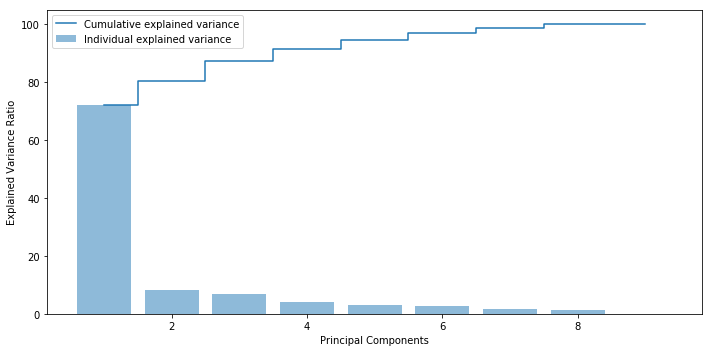

In [216]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [208]:
pca.explained_variance_ratio_

array([0.72218184, 0.08252642, 0.06896784, 0.0407681 , 0.03016724,
       0.02667883, 0.01530019, 0.01340953, 0.        ])

In [214]:
pca.components_

array([[ 0.34708847,  0.45121058,  0.43962189,  0.23603836,  0.17556847,
         0.51068408,  0.28725734,  0.22982123, -0.        ],
       [ 0.33056827,  0.36496577,  0.30883461, -0.04910784,  0.05447492,
        -0.80799489, -0.04017457,  0.04792644, -0.        ],
       [ 0.8700809 , -0.30994456, -0.23793163, -0.18836223, -0.10446313,
         0.12901239, -0.12295075, -0.11012801,  0.        ],
       [ 0.07657139, -0.23776169, -0.40268877,  0.38801714,  0.09935506,
        -0.23667517,  0.4794085 ,  0.57373476, -0.        ],
       [-0.04203213, -0.00909087,  0.05075905, -0.26184767,  0.07285931,
         0.09287263, -0.6012682 ,  0.74266595, -0.        ],
       [ 0.073863  ,  0.02956942, -0.09816938,  0.79378448,  0.13148884,
        -0.01576399, -0.55483263, -0.1690024 , -0.        ],
       [ 0.00999082,  0.6473285 , -0.68335159, -0.19121748,  0.25864134,
         0.06171887, -0.0348843 , -0.07355945,  0.        ],
       [-0.00529162, -0.30103415,  0.11576252, -0.14357771,  0

# Q10 Find correlation between components and features

In [253]:
P_reduce = np.array(eigvectors_sorted[0:8])   # Reducing from 8 to 4 dimension space

X_std_4D = np.dot(X,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot


In [254]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

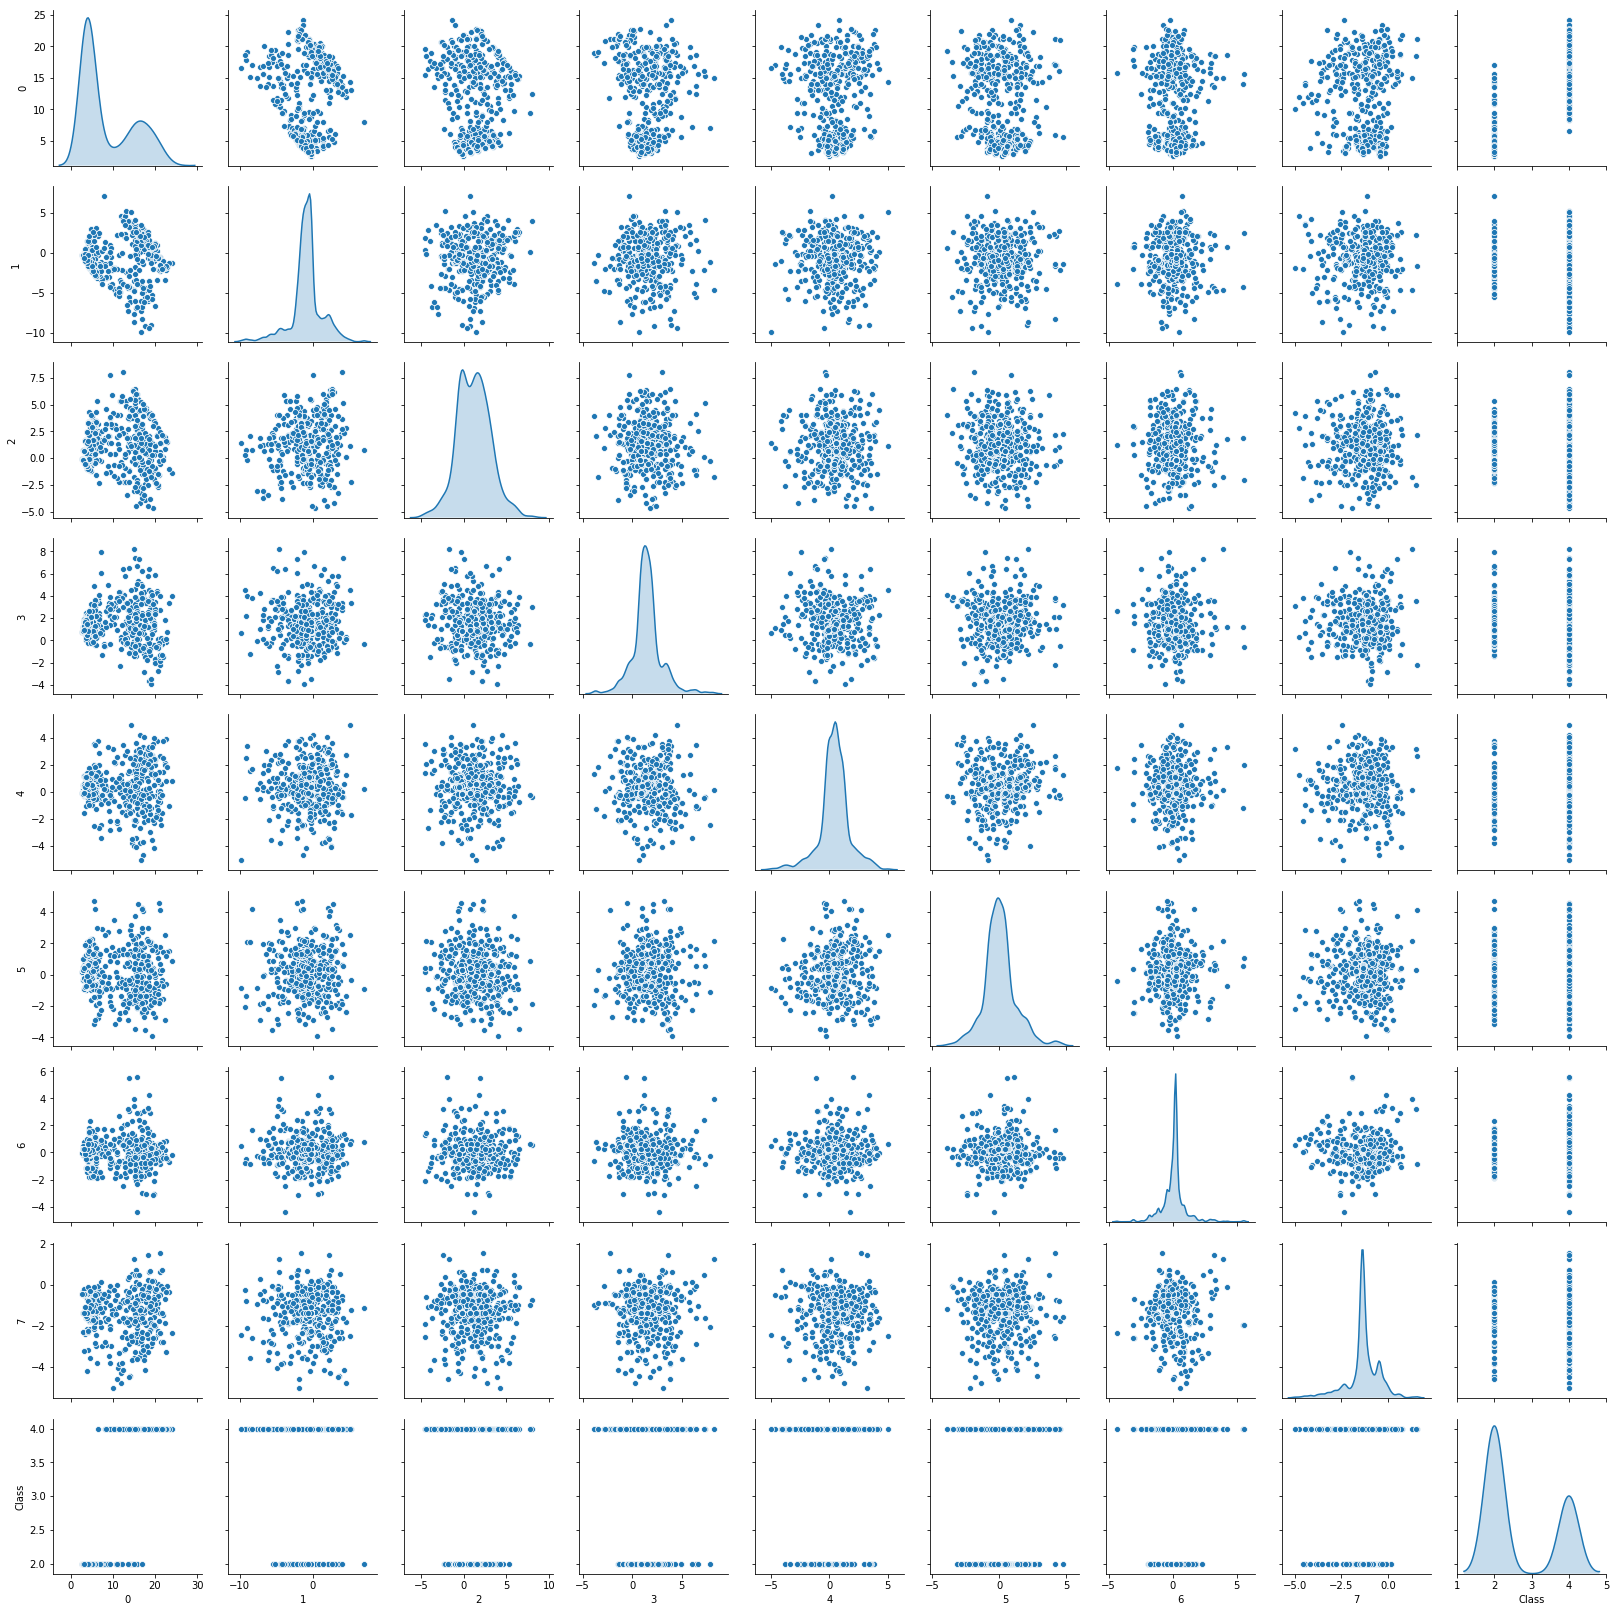

In [255]:
#Let us check it visually
Proj_data_mpg_df = Proj_data_df.join(Y)

sns.pairplot(Proj_data_mpg_df, diag_kind='kde') 

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [211]:
jokes_df= pd.read_csv("D:/my_work/residency5/Lab/jokes.csv")
jokes_df.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [248]:
ratings = jokes_df.iloc[0:200,1:]



# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [249]:
ratings = ratings.replace(99.00,0)

### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [258]:
ratings_diff = ratings.mean()
ratings_diff.sort_values(ascending=False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64